In [227]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [228]:
# Read in data
diabetes_data = pd.read_csv('Dataset of Diabetes .csv')

# Look at data
sample = diabetes_data.head(5)
print(sample)

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [229]:
# Converting class objects to integer values for better/faster processing
mapping = {'N': 0, 'Y': 1, 'P': 2}
diabetes_data['CLASS'] = diabetes_data['CLASS'].replace(mapping)
# Convert column to numeric, setting non-numeric values to NaN
diabetes_data['CLASS'] = pd.to_numeric(diabetes_data['CLASS'], errors='coerce')
# Drop rows with NaN values in 'CLASS' column
diabetes_data.dropna(subset=['CLASS'], inplace=True)
# Convert 'CLASS' back to integer type
diabetes_data['CLASS'] = diabetes_data['CLASS'].astype(int)

patient_classes = ['N', 'Y', 'P'] # N = Not Diabetic, Y = Diabetic, P = Pre-diabetic
print(sample.columns[3:13].values, 'CLASS')
for index, row in diabetes_data.sample(10).iterrows():
    print('[', row[3], row[4], row[5], row[6], row[7], row[8], row[9], row[10], row[11], row[12],']', patient_classes[int(row[13])])

['AGE' 'Urea' 'Cr' 'HbA1c' 'Chol' 'TG' 'HDL' 'LDL' 'VLDL' 'BMI'] CLASS
[ 56 2.6 68 8.0 3.0 2.0 1.1 2.3 0.5 30.0 ] Y
[ 45 4.3 71 7.2 5.6 2.0 1.1 3.0 1.0 19.0 ] Y
[ 55 5.1 71 9.7 3.2 1.4 1.0 3.0 2.0 33.0 ] Y
[ 69 10.3 185 7.6 4.6 3.2 0.6 2.7 1.4 33.0 ] Y
[ 54 2.9 79 10.3 5.0 3.2 1.8 1.7 2.0 30.0 ] Y
[ 55 5.8 60 9.0 4.6 1.9 1.2 2.6 0.8 30.0 ] Y
[ 64 8.8 106 8.5 5.9 2.1 1.2 4.0 1.2 32.0 ] Y
[ 55 8.5 59 7.6 3.3 1.7 0.9 1.7 0.8 32.0 ] Y
[ 60 4.1 56 13.1 4.4 2.0 1.0 2.5 0.9 29.0 ] Y
[ 57 6.4 75 7.3 6.1 4.3 1.2 3.7 1.9 30.1 ] Y


/var/folders/x2/czsvs3ws22x4lyrn8hr61_v80000gn/T/ipykernel_7654/1915852985.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('[', row[3], row[4], row[5], row[6], row[7], row[8], row[9], row[10], row[11], row[12],']', patient_classes[int(row[13])])


In [230]:
# Count the number of null values for each column
diabetes_data.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

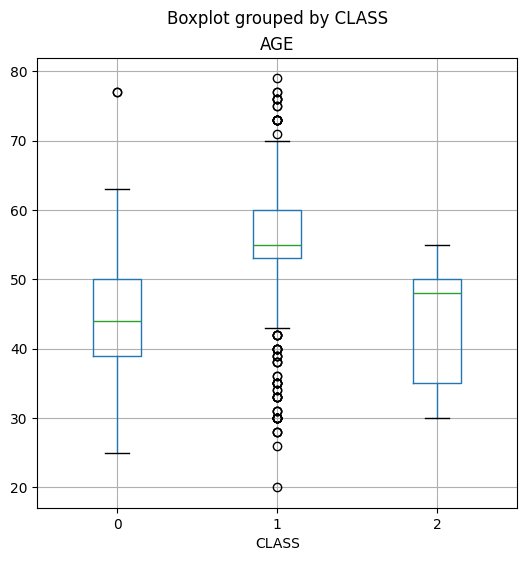

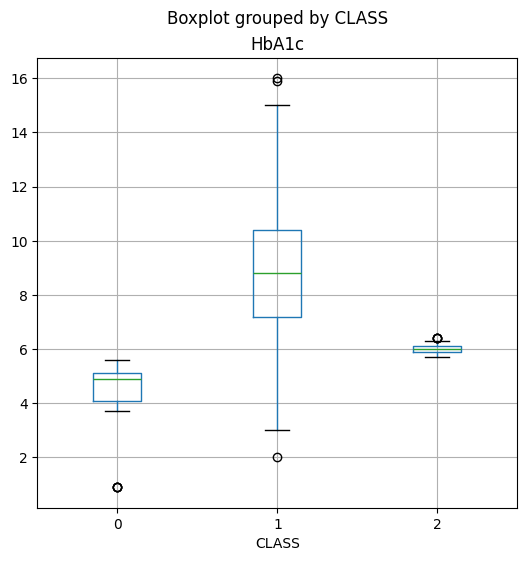

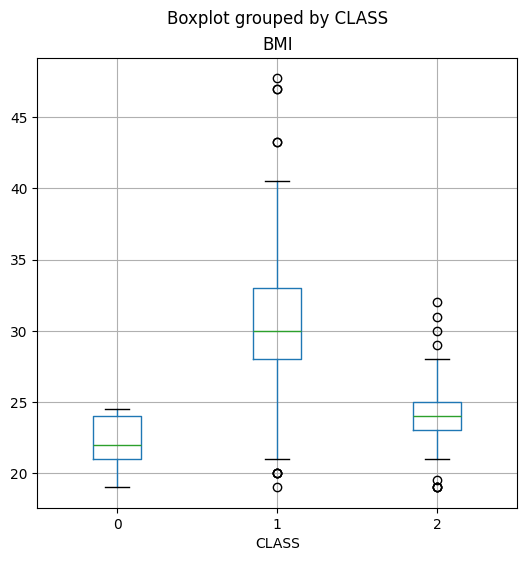

In [231]:
%matplotlib inline
# Reformatted based on most significant differences between groups
data_features = ['AGE','HbA1c','BMI']
# label we want our model to predict
diabetic_label = 'CLASS'
# Showcase difference of each feature between labels
for col in data_features:
    diabetes_data.boxplot(column=col, by=diabetic_label, figsize=(6,6))
    plt.title(col)
plt.show()

In [232]:
# Separate features and labels
data_X, data_y = diabetes_data[data_features].values, diabetes_data[diabetic_label].values

# Split data 70%-30% into training set and test set
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(data_X, data_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=data_y)

print ('Training Set: %d, Test Set: %d \n' % (x_data_train.shape[0], x_data_test.shape[0]))

Training Set: 696, Test Set: 299 



In [233]:
# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
diabetes_multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_data_train, y_data_train)
print (diabetes_multi_model)

LogisticRegression(C=10.0, max_iter=10000, multi_class='auto')


/Users/wyattfoss/PycharmProjects/BINF6400/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [234]:
diabetic_predictions = diabetes_multi_model.predict(x_data_test)
print('Predicted labels: ', diabetic_predictions[:20])
print('Actual labels   : ', y_data_test[:20])

Predicted labels:  [1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
Actual labels   :  [1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1]


In [235]:
# Show classification report across all labels
print(classification_report(y_data_test, diabetic_predictions))
print("Overall Accuracy:",accuracy_score(y_data_test, diabetic_predictions))
print("Overall Precision:",precision_score(y_data_test, diabetic_predictions, average='macro'))
print("Overall Recall:",recall_score(y_data_test, diabetic_predictions, average='macro'))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        31
           1       0.95      0.98      0.96       252
           2       0.33      0.06      0.11        16

    accuracy                           0.92       299
   macro avg       0.68      0.66      0.64       299
weighted avg       0.90      0.92      0.91       299

Overall Accuracy: 0.9230769230769231
Overall Precision: 0.6833265333877329
Overall Recall: 0.658058115719406


One Problem with this dataset is that for classes N and P, there isn't a lot of data to properly train a model on. Therefore, our precision and recall for these groups are going to be significantly lower. That being said, precision and recall of 60-70% for this lack of data is still pretty decent.

[[ 29   1   1]
 [  5 246   1]
 [  4  11   1]]


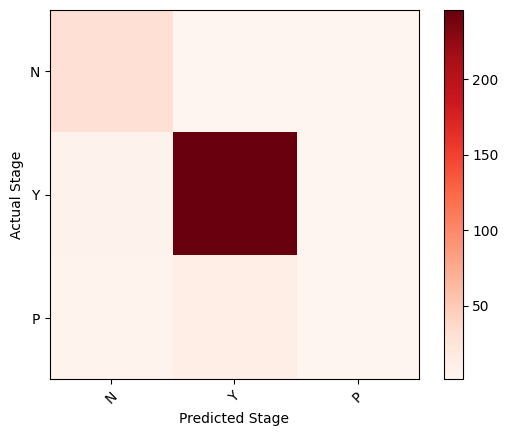

In [236]:
# Create confusion matrix to show false and true positives
mcm = confusion_matrix(y_data_test, diabetic_predictions)
print(mcm)

# Visualize confusion matrix as heatmap
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Reds)
plt.colorbar()
tick_marks = np.arange(len(patient_classes))
plt.xticks(tick_marks, patient_classes, rotation=45)
plt.yticks(tick_marks, patient_classes)
plt.xlabel("Predicted Stage")
plt.ylabel("Actual Stage")
plt.show()

From our heatmap, we can see that all diabetic patients are being accurately predicted, most non-diabetic patients are being accurately predicted (N to N a light color but there are much fewer N patients)), but pre-diabetic patients are not as well characterized. 

Shape of y_data_test: (299,)
Shape of diabetic_prob: (299, 3)
Unique values in y_data_test: [0 1 2]
Example values in diabetic_prob: [[6.43059204e-07 9.95898171e-01 4.10118637e-03]
 [9.55022453e-07 9.95689661e-01 4.30938411e-03]
 [1.37291495e-01 3.80630792e-01 4.82077713e-01]
 [2.90835978e-09 9.99500883e-01 4.99114178e-04]
 [2.08601730e-08 9.98379742e-01 1.62023684e-03]]


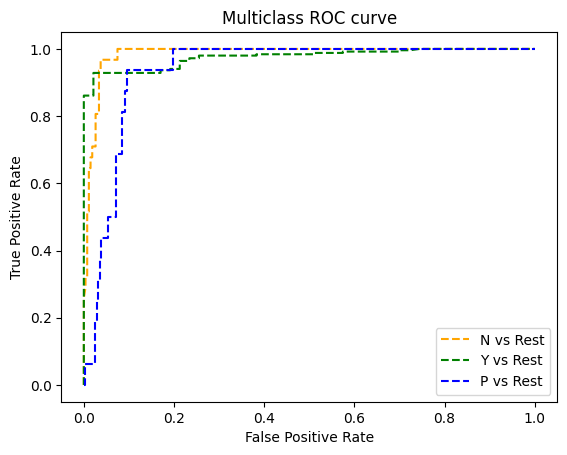

In [237]:
# Get class probability scores
diabetic_prob = diabetes_multi_model.predict_proba(x_data_test)

# Controls to make sure all roc input data have proper dimensions
print("Shape of y_data_test:", y_data_test.shape)
print("Shape of diabetic_prob:", diabetic_prob.shape)
print("Unique values in y_data_test:", np.unique(y_data_test))
print("Example values in diabetic_prob:", diabetic_prob[:5])

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(patient_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_data_test, diabetic_prob[:,i], pos_label=i)

# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=patient_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=patient_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=patient_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [238]:
# Quantify ROC performance
auc = roc_auc_score(y_data_test,diabetic_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9661377481284236


In [239]:
# Save model
import joblib

filename = './diabetes_multi_model.pkl'
joblib.dump(diabetes_multi_model, filename)

['./diabetes_multi_model.pkl']

In [240]:
# Let's test our model on a new numpy array with four new patients' Age, A1C, and BMI data
diabetes_multi_model = joblib.load(filename)

new_patients = np.array([[51,10.5,32.3],[38,4.6,25],[22,6.3,20],[67,11,37]])
# John and Gloria are supposed to be diabetic, Harriet is not diabetic, and Tinh is pre-diabetic
patient_names = ['John', 'Harriet', 'Tinh', 'Gloria']
# Call the web service, passing the input data
predictions = diabetes_multi_model.predict(new_patients)

# Get the predicted classes for each patient.
for i, prediction in enumerate(predictions):
    print(patient_names[i] + ':', patient_classes[prediction])
        

John: Y
Harriet: N
Tinh: P
Gloria: Y


Despite our model not having much trained data on P (pre-diabetic) patients, it still performed well and accurately labeled each new patient based on the input features. 